In [72]:
print('Hello world')

Hello world


In [73]:
# Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical


## Loading kaggles 42000 images

In [74]:
train=pd.read_csv("/home/anushka/Documents/Deep  Learning Projects/Digit Recognizer/digit-recognizer/train.csv")
test=pd.read_csv("/home/anushka/Documents/Deep  Learning Projects/Digit Recognizer/digit-recognizer/test.csv")


In [75]:
# Prepare data
Y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)
X_train=X_train/255.0
X_test=test/255.0
X_train=X_train.values.reshape(-1,1,28,28)
X_test=X_test.values.reshape(-1,1,28,28)
Y_train=to_categorical(Y_train,num_classes=10)

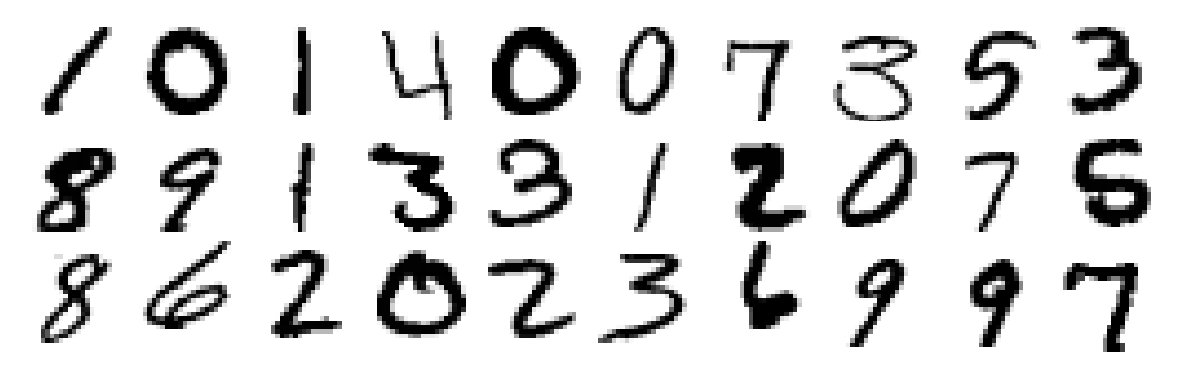

In [76]:
import matplotlib.pyplot as plt
# Preview images
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1,hspace=-0.1)
plt.show()

## Generate 25 Million nore images

In [77]:
# Create more images via data Augmentation
datagen=ImageDataGenerator(rotation_range=10,
                           zoom_range=0.10,
                           width_shift_range=0.1,
                           height_shift_range=0.1)

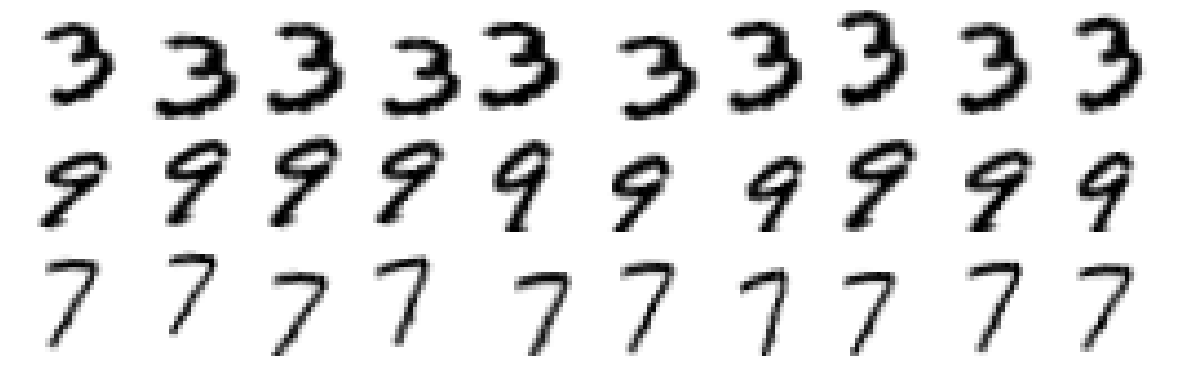

In [79]:
# Preview augmentaed images
X_train3=X_train[9,].reshape((1,28,28,1))
Y_train3=Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3,10,i+1)
    X_train2,Y_train2=datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9:
        X_train3=X_train[11,].reshape((1,28,28,1))
        Y_train3=Y_train[11,].reshape((1,10))
    if i==19:
        X_train3=X_train[18,].reshape((1,28,28,1))
        Y_train3=Y_train[18,].reshape((1,10))
plt.subplots_adjust(wspace=-0.1,hspace=-0.1)
plt.show()


## Build 15 CNNs

In [84]:
nets=15
model=[0]*nets

for j in range(nets):
    model[j]=Sequential()
    model[j].add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
    model[j].add(BatchNormalization())

    model[j].add(Conv2D(filters=32,kernel_size=3,activation='relu'))
    model[j].add(BatchNormalization())

    model[j].add(Conv2D(filters=32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))


    model[j].add(Conv2D(filters=64,kernel_size=3,activation='relu'))
    model[j].add(BatchNormalization())

    model[j].add(Conv2D(filters=64,kernel_size=3,activation='relu'))
    model[j].add(BatchNormalization())

    model[j].add(Conv2D(filters=64,kernel_size=5,padding='same',strides=2,activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(filters=128,kernel_size=4,activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10,activation='softmax'))

    model[j].compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])




## Train 15 CNNs

In [87]:
# Decrease learning rate each epoch
annealer=LearningRateScheduler(lambda x: 1e-3*0.95**x)

# Train networkd
history=[0]*nets
epochs=45

for j in range(nets):
    X_train2,X_val2,Y_train2,Y_val2=train_test_split(X_train,Y_train,test_size=0.1)
    history[j]=model[j].fit(datagen.flow(X_train2,Y_train2,batch_size=64),
                                      epochs=epochs,
                                      steps_per_epoch=X_train2.shape[0]//64,
                                      validation_data=(X_val2,Y_val2),
                                      callbacks=[annealer],
                                      verbose=0)
    print(f"CNN {j+1}: epochs={epochs}, Train accuracy: {max(history[j].history['acc'])}, Validation accuracy: {max(history[j].history['val_acc'])}")

2024-02-25 14:15:12.075439: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_fused_impl.h:761 : INVALID_ARGUMENT: Computed output size would be negative: -1 [input_size: 1, effective_filter_size: 3, stride: 1]


InvalidArgumentError: Graph execution error:

Detected at node sequential_15/conv2d_15/Relu defined at (most recent call last):
  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_68705/2907867435.py", line 10, in <module>

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 2913, in fit_generator

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/anushka/anaconda3/envs/torch/lib/python3.10/site-packages/keras/src/backend.py", line 5395, in relu

Computed output size would be negative: -1 [input_size: 1, effective_filter_size: 3, stride: 1]
	 [[{{node sequential_15/conv2d_15/Relu}}]] [Op:__inference_train_function_11707]

In [89]:
model[0].summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)      